<a href="https://www.kaggle.com/code/mcsadri/chess-board?scriptVersionId=127109792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Lab 11: Numpy Arrays

#### Overview

Today we’ll be constructing chess boards like it’s 1980. No prebuilt images, just the power of arrays and pixel art.

#### Feature Tasks and Requirements

- Render chess boards with red and blue queens on them.
- The only pieces are queens and each queen is represented by a blue or red square.
- Chess board is an 8 by 8 grid of alternating black and white squares. The queens are red and blue squares.
- Each board will have one red and one blue queen at different coordinates. In addition to displaying the board you’ll need to identify if the queens are “under attack” based on their coordinates.

#### Implentation Notes

- [X] Define a ChessBoard class
- [X] Should contain an 8x8 grid
    - [X] Each cell in grid should have a color represented in RGB format:
        - [X] black = (0,0,0)
        - [X] white = (1,1,1)
        - [X] blue = (0,1,1)
        - [X] red = (1,.2,0)
- [X] should have `add_red` method that accepts a row and column as input which colors corresponding cell.
- [X] should have `add_blue` method that accepts a row and column as input which colors corresponding cell.
- [X] should have `render` method that displays the chess board on screen with red and blue shown in correct locations
- [X] should have `is_under_attack` method that return boolean if red is under attack by a blue piece horizontally, vertically or diagonally
- [X] Diagonal attacks can come from four directions. Make sure to handle all of them.
- [X] Render your board for each `is_under_attack` scenario:
    - [X] Horizontal (aka same row).
    - [X] Vertical (aka same column).
    - [X] Four Diagonals.
    - [X] A “Not Under Attack” scenario.
    
#### User Acceptance Testing

- There are no acceptance tests required.
- But Notebook should clearly show the various is_under_attack scenarios have been handled.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
rbg_colors = {
    "black": [0,  0, 0],
    "white": [1,  1, 1],
    "blue":  [0,  1, 1],
    "red":   [1, .2, 0]
}

In [3]:
class ChessBoard:
    def __init__(self):
        """
        create an 8 x 8, black and white chessboard
        param: none
        return: none
        """
        # set 8 x 8 board with default color of white
        self.board = np.ones((8, 8, 3))
        
        # update board for alternating black squares
        for row in range(8):
            for col in range(8):
                if (row % 2 == 0 and col % 2 == 0) or (row % 2 == 1 and col % 2 == 1):
                    self.board[row, col] = rbg_colors.get("black")
                    
        # placeholders queen positions
        self.red_queen = None
        self.blue_queen = None

    def add_red(self, row, col):
        """
        place the red queen on the chessboard per input coordinates
        param row: red queen row location
        param col: red queen column location
        return: none
        """
        self.board[row, col] = rbg_colors.get("red")
        self.red_queen = [row, col]
    
    def add_blue(self, row, col):
        """
        place the blue queen on the chessboard per input coordinates
        param row: blue queen row location
        param col: blue queen column location
        return: none
        """
        self.board[row, col] = rbg_colors.get("blue")
        self.blue_queen = [row, col]
        
        
    def render(self):
        """
        render the chessboard
        param: none
        return: none
        """
        plt.imshow(self.board)
    
    def is_under_attack(self):
        """
        validate if the queens are attacking each other
        param: none
        return: Boolean: True if under attack, False is no attack
        """
        # horizontal attack
        if self.red_queen[0] == self.blue_queen[0]:
            return True
        # vertical attack
        elif self.red_queen[1] == self.blue_queen[1]:
            return True
        # diagonal attack - solution via ChatGPT
        elif abs(self.blue_queen[1] - self.red_queen[1]) == abs(self.blue_queen[0]-self.red_queen[0]):
            return True
        # no attack
        else:
            return False


### Render chess board with no queen placement

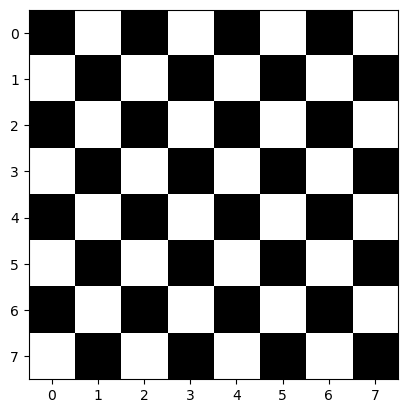

In [4]:
board = ChessBoard()
board.render()

### Add red and blue queens with horizonal attack

Is the red queen at [2, 1] and the blue queen at [2, 7] under attack? True


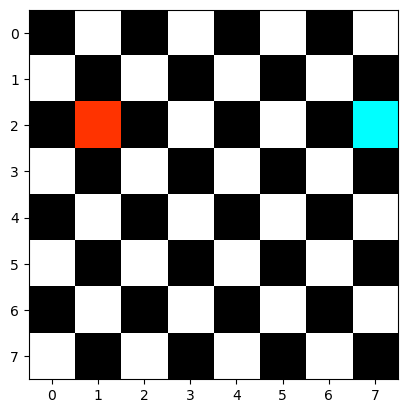

In [5]:
board = ChessBoard()
board.add_red(2, 1)
board.add_blue(2, 7)
board.render()
print("Is the red queen at", board.red_queen, "and the blue queen at", board.blue_queen, "under attack?", board.is_under_attack())

### Add red and blue queens with vertical attack

Is the red queen at [1, 3] and the blue queen at [6, 3] under attack? True


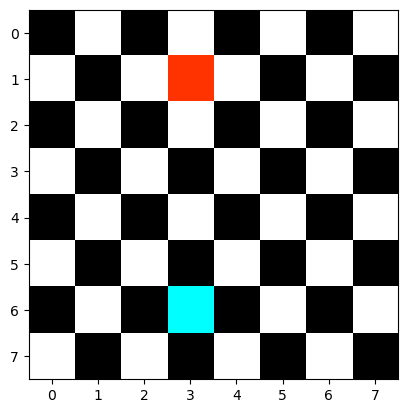

In [6]:
board = ChessBoard()
board.add_red(1, 3)
board.add_blue(6, 3)
board.render()
print("Is the red queen at", board.red_queen, "and the blue queen at", board.blue_queen, "under attack?", board.is_under_attack())

### Add red and blue queens with diagonal attack

Is the red queen at [2, 1] and the blue queen at [5, 4] under attack? True


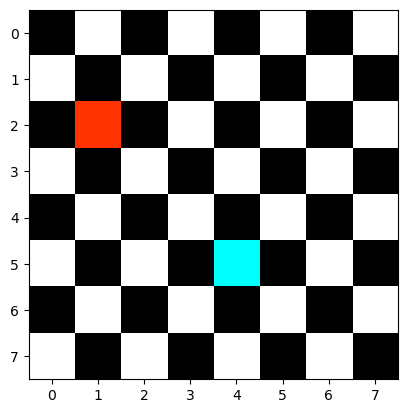

In [7]:
board = ChessBoard()
board.add_red(2, 1)
board.add_blue(5, 4)
board.render()
print("Is the red queen at", board.red_queen, "and the blue queen at", board.blue_queen, "under attack?", board.is_under_attack())

### Add red and blue queens with no attack

Is the red queen at [1, 3] and the blue queen at [6, 6] under attack? False


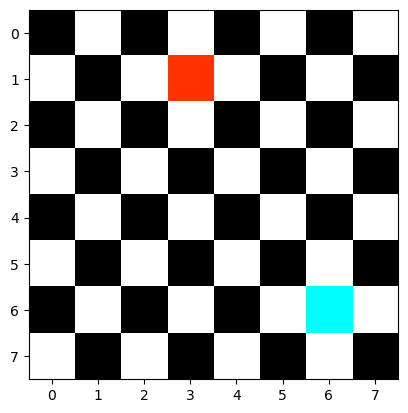

In [8]:
board = ChessBoard()
board.add_red(1, 3)
board.add_blue(6, 6)
board.render()
print("Is the red queen at", board.red_queen, "and the blue queen at", board.blue_queen, "under attack?", board.is_under_attack())